# Airline Flight Fare Prediction: Machine Learning Model

## Data Exploration

In [1]:
import pandas as pd

df = pd.read_csv('uaeflights.csv')
df

,airline,source,destination,depart,arrival,stops,class,duration,days_left,price
0,Fly Dubai,Abu Dhabi,Frankfurt,Evening,Evening,0,First Class,11,355,5366
1,Etihad Airways,Sharjah,Paris,Night,Evening,1,First Class,7,308,5476
2,Emirates,Sharjah,Istanbul,Morning,Afternoon,0,Economy,3,57,761
3,Fly Dubai,Sharjah,New York,Afternoon,Night,1,Economy,10,60,1610
4,Fly Dubai,Sharjah,London,Afternoon,Night,2,Economy,7,93,1691
...,...,...,...,...,...,...,...,...,...,...
299995,Etihad Airways,Sharjah,London,Night,Afternoon,1,Business,3,336,1906
299996,Fly Dubai,Sharjah,Istanbul,Night,Night,0,First Class,14,79,6261
299997,Air Arabia,Dubai,Bangkok,Afternoon,Evening,1,Business,13,27,3457
299998,Etihad Airways,Dubai,Frankfurt,Afternoon,Night,2,Business,13,5,3872


In [3]:
df.airline.value_counts()

airline
Emirates          75215
Air Arabia        75193
Etihad Airways    74981
Fly Dubai         74611
Name: count, dtype: int64

In [4]:
df.source.value_counts()

source
Abu Dhabi    100361
Dubai         99958
Sharjah       99681
Name: count, dtype: int64

In [5]:
df.destination.value_counts()

destination
Paris        30257
Mumbai       30164
Cairo        30065
London       30055
New York     30042
Singapore    30025
Istanbul     29928
Sydney       29881
Frankfurt    29844
Bangkok      29739
Name: count, dtype: int64

In [6]:
df.depart.value_counts()

depart
Morning      75286
Evening      75082
Night        74828
Afternoon    74804
Name: count, dtype: int64

In [7]:
df.arrival.value_counts()

arrival
Afternoon    75176
Evening      75091
Night        75083
Morning      74650
Name: count, dtype: int64

In [8]:
df.stops.value_counts()

stops
1    100427
2    100007
0     99566
Name: count, dtype: int64

In [9]:
df["class"].value_counts()

class
First Class    100243
Business       100008
Economy         99749
Name: count, dtype: int64

In [10]:
df.duration.value_counts()

duration
7     23438
13    23205
5     23202
14    23088
3     23084
9     23076
8     23066
12    23054
10    23009
2     22955
4     22947
6     22941
11    22935
Name: count, dtype: int64

In [11]:
df.days_left.value_counts()

days_left
215    913
296    905
131    904
263    903
253    896
      ... 
149    765
94     761
127    749
162    741
168    730
Name: count, Length: 364, dtype: int64

In [12]:
df.price.value_counts()

price
300     2770
1156     101
5684     101
2513      99
5789      98
        ... 
4460       1
4498       1
3946       1
7084       1
4061       1
Name: count, Length: 6356, dtype: int64

## Data Preprocessing

In [13]:
df['class'] = df['class'].apply(lambda x: 1 if x == "Business" else (2 if x == "First Class" else 0))

In [14]:
df['source'] = df['source'].apply(lambda x: 1 if x == "Sharjah" else (2 if x == "Abu Dhabi" else 0))

In [15]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.depart, prefix='depart')).drop('depart', axis=1)
df = df.join(pd.get_dummies(df.arrival, prefix='arrival')).drop('arrival', axis=1)
df = df.join(pd.get_dummies(df.destination, prefix='destination')).drop('destination', axis=1)

## Model Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x, y = df.drop('price', axis=1), df.price


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

## Model Evaluation

In [19]:
reg.score(x_test, y_test)

0.9989929706070426

R2 Score:  0.9989929706070426
MSE Score:  3774.638141576539
MAE Score:  51.914586317460326
RMSE Score:  61.43808380456326


Text(0.5, 1.0, 'Actual Flight Price vs Predicted Flight Price')

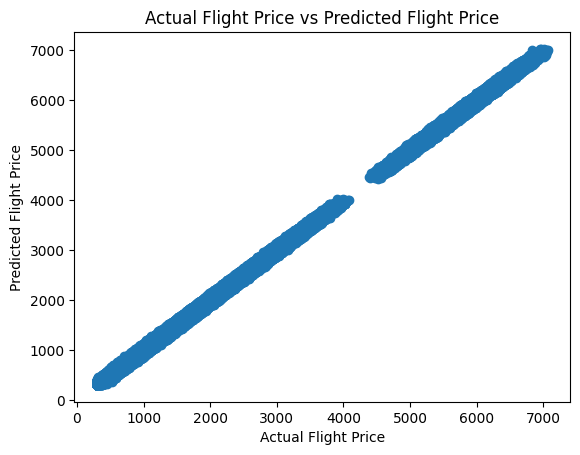

In [20]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = reg.predict(x_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual Flight Price vs Predicted Flight Price')

In [21]:
imp = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_imp = sorted(imp.items(), key=lambda x: x[1], reverse=True)

sorted_imp

[('class', np.float64(0.93439641289999)),
 ('duration', np.float64(0.03702315402838647)),
 ('stops', np.float64(0.015963258365541445)),
 ('days_left', np.float64(0.011978337020966113)),
 ('source', np.float64(6.577800187204982e-05)),
 ('arrival_Afternoon', np.float64(2.837002758648455e-05)),
 ('arrival_Evening', np.float64(2.7947111719425017e-05)),
 ('depart_Evening', np.float64(2.7938373249482383e-05)),
 ('airline_Fly Dubai', np.float64(2.7931434087064634e-05)),
 ('arrival_Morning', np.float64(2.7913028449911557e-05)),
 ('depart_Morning', np.float64(2.7881100217366574e-05)),
 ('airline_Etihad Airways', np.float64(2.7856641624544208e-05)),
 ('depart_Afternoon', np.float64(2.7734409244679383e-05)),
 ('arrival_Night', np.float64(2.7706489411542233e-05)),
 ('depart_Night', np.float64(2.768085202133918e-05)),
 ('airline_Air Arabia', np.float64(2.767899276829223e-05)),
 ('airline_Emirates', np.float64(2.7515294120382522e-05)),
 ('destination_Paris', np.float64(2.429371532593149e-05)),
 ('de

<BarContainer object of 5 artists>

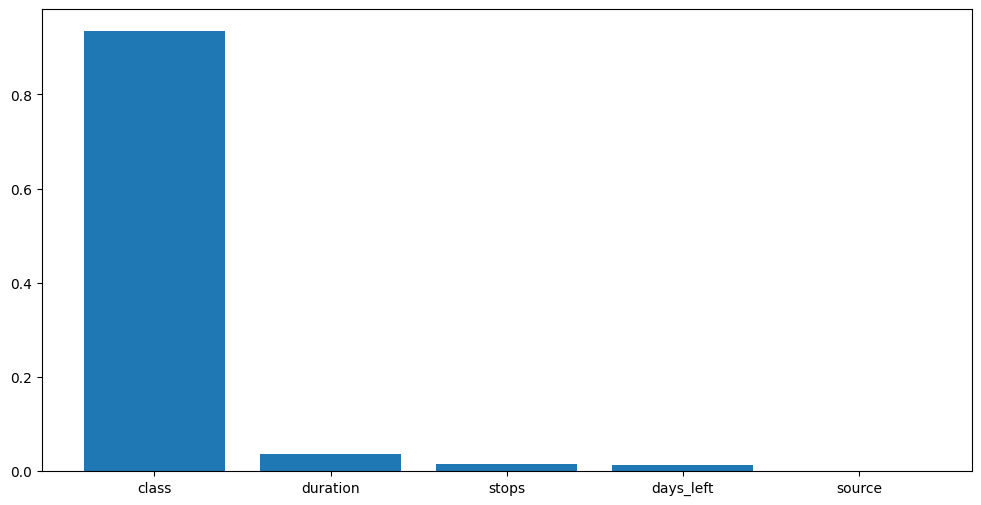

In [23]:
plt.figure(figsize=(12, 6))
plt.bar([x[0] for x in sorted_imp[:5]], [x[1] for x in sorted_imp[:5]])

## Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"]
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_params

C:\Users\arman\OneDrive - Axtrion GmbH & Co.KG\Arman\Projects\Python\AirlineTicketPriceAI\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\arman\OneDrive - Axtrion GmbH & Co.KG\Arman\Projects\Python\AirlineTicketPriceAI\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\arman\OneDrive - Axtrion GmbH & Co.KG\Arman\Projects\Python\AirlineTicketPriceAI\.venv\Lib\site-p

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [25]:
reg = RandomForestRegressor(n_jobs=-1, **best_params)
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.9969777002125573

R2 Score:  0.9969777002125573
MSE Score:  11328.455884944347
MAE Score:  85.69808475822066
RMSE Score:  106.43521919432659


Text(0.5, 1.0, 'Actual Flight Price vs Predicted Flight Price')

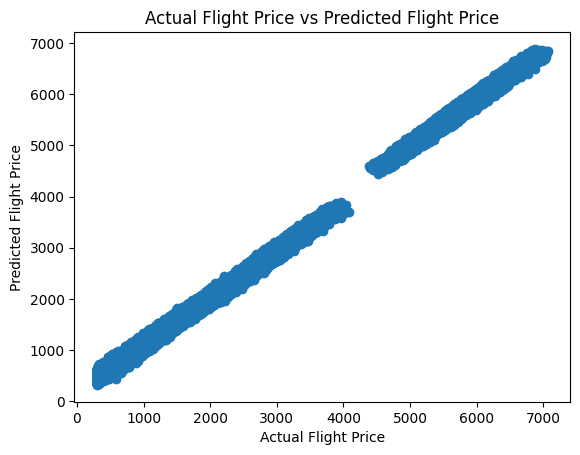

In [27]:
y_pred = reg.predict(x_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual Flight Price vs Predicted Flight Price')

In [28]:
df

,source,stops,class,duration,days_left,price,airline_Air Arabia,airline_Emirates,airline_Etihad Airways,airline_Fly Dubai,...,destination_Bangkok,destination_Cairo,destination_Frankfurt,destination_Istanbul,destination_London,destination_Mumbai,destination_New York,destination_Paris,destination_Singapore,destination_Sydney
0,2,0,2,11,355,5366,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,1,1,2,7,308,5476,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,1,0,0,3,57,761,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,1,1,0,10,60,1610,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,1,2,0,7,93,1691,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,1,1,3,336,1906,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
299996,1,0,2,14,79,6261,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
299997,0,1,1,13,27,3457,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
299998,0,2,1,13,5,3872,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
